¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

El prósito principal del proyecto es claro, el cliente está interesado en saber a qué plan de prepago le debe de dar más publicidad de primera mano para ver cuál de los dos se potencializa y probablemente ver si se sigue invirtiendo en el otro plan, modificarlo o lo que sea necesario y que sea de provecho para la empresa   

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

<div class="alert alert-block alert-info">
<b>Listo, está cargada :)</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv', sep= ',')
calls = pd.read_csv('/datasets/megaline_calls.csv', sep= ',')
messages = pd.read_csv('/datasets/megaline_messages.csv', sep= ',')
internet = pd.read_csv('/datasets/megaline_internet.csv', sep= ',')
plans = pd.read_csv('/datasets/megaline_plans.csv', sep= ',')


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

## Preparar los datos

Se prepararon los datos para ser leídos, y se empezó con un general '.info()' y un .head() para saber con qué datos estamos trabajando.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Es un DF que tiene 8 columnas y 2 filas, más la de encabezado. No tiene datos ausentes y es la descripción a detalle de los dos planes de los que se requiere al final sacar conclusiones.

Es necesario convertir la columna 'mb_per_month_included' a GB ya que así es como se cobrará el excedente.


## Corregir datos

In [5]:
plans ['mb_per_month_included'] = plans ['mb_per_month_included']/1024
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Enriquecer los datos


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>Vale, lo agrego</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users.sample(10, random_state=23454)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
367,1367,Minh,Fischer,18,"Baltimore-Columbia-Towson, MD MSA",2018-07-23,surf,NaN
328,1328,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,NaN
437,1437,Louis,Neal,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-12,surf,NaN
157,1157,Luciano,Sheppard,63,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-07-02,surf,NaN
98,1098,Collin,Sims,33,"Albany-Schenectady-Troy, NY MSA",2018-08-14,surf,NaN
145,1145,Venice,Brooks,29,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-12,surf,NaN
172,1172,Weldon,Robinson,72,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-30,surf,2018-11-29
130,1130,Clarence,Cunningham,27,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-05-17,surf,NaN
190,1190,Troy,Hutchinson,56,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",2018-08-01,ultimate,NaN
77,1077,Chau,Webster,23,"Charlotte-Concord-Gastonia, NC-SC MSA",2018-01-14,ultimate,NaN


Existen valores NaN y la columna 'reg_date' requiere que se le de el formato adecuado de acuerdo a la documentación.

### Corregir los datos

Resetee la columna con la fecha y también la columna con la fecha de las bajas, para darle el formato adecuado según requerimientos y agregué un .head() para comprobar que estuviera bien.

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

users['reg_date'] = users['reg_date'].dt.strftime('%d-%m-%y')

In [9]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['churn_date'] = users['churn_date'].dt.strftime('%d-%m-%y')

In [10]:
users.head(12)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-18,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",21-10-18,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",28-01-18,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",23-05-18,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",29-11-18,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",27-11-18,ultimate,18-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",11-07-18,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",03-08-18,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",22-04-18,surf,NaN


### Enriquecer los datos

In [11]:
#Veriqué que de casualidad no hubiera duplicados
users.duplicated().sum() 

0

In [12]:
#Verificar los datos ausentes 
users[users['churn_date'].isna()]

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-18,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",21-10-18,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",28-01-18,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",23-05-18,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",04-09-18,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",20-02-18,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",10-12-18,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",04-02-18,surf,NaN


In [13]:
#Rellenar los datos ausentes.
users['churn_date'] = users['churn_date'].fillna('in_use') 

In [14]:
users.head(12)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-18,ultimate,in_use
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,in_use
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",21-10-18,surf,in_use
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",28-01-18,surf,in_use
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",23-05-18,surf,in_use
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",29-11-18,surf,in_use
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",27-11-18,ultimate,18-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",11-07-18,surf,in_use
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",03-08-18,ultimate,in_use
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",22-04-18,surf,in_use


Verifiqué que no hubiera filas duplicadas y rellené con una etiqueta de 'in_use' para que fuera reconocible qué estaba pasando con esa línea.

## Llamadas

In [15]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Imprime una muestra de datos para las llamadas
calls.sample(10, random_state=23454)

,id,user_id,call_date,duration
137058,1497_423,1497,2018-12-21,4.51
131014,1470_463,1470,2018-12-24,8.76
37138,1140_422,1140,2018-09-21,4.72
88220,1324_268,1324,2018-04-28,6.60
133936,1487_45,1487,2018-12-24,0.00
21372,1079_85,1079,2018-10-01,6.01
11851,1052_70,1052,2018-12-06,3.45
91105,1328_735,1328,2018-07-17,4.70
124532,1440_48,1440,2018-11-01,6.77
107190,1380_388,1380,2018-11-12,14.76


Tenemos un DF que contiene todos sus datos llenos, 'id' para que el proceso de datos sea más eficiente, requiero quitar el '_' y convertirlo a 'int64'. Eso sí, por generalizar la info cambiaré la fecha para estandarizarla con la DF de 'users'.

### Corregir los datos

In [17]:
#Estandarización de fecha
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

In [18]:
#Conversión de datos de 'id'
calls['id'] = calls['id'].str.replace('_','')
calls['id'] = calls['id'].astype('int')

In [19]:
calls.dtypes

id                    int64
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

In [20]:
#Verificar que no haya duplicados
calls.duplicated().sum()

0

<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Qué podríamos decir hasta el momento de las llamadas que tienen una duración de 0?
</div>

<div class="alert alert-block alert-info">
<b>Se podría inferir que la llamada se efectuó, se fue directamente al buzón de llamadas, fallas en la red o algún problema tal vez más relacionado con el usuario más que con Megaline</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Mensajes

In [21]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Imprime una muestra de datos para los mensajes
messages.sample(10, random_state=34564)


,id,user_id,message_date
7491,1059_373,1059,2018-07-23
49900,1328_858,1328,2018-05-22
56125,1355_140,1355,2018-11-14
18894,1122_123,1122,2018-06-08
24561,1145_416,1145,2018-10-18
45543,1312_27,1312,2018-06-25
22896,1137_288,1137,2018-12-13
18485,1120_300,1120,2018-12-05
22706,1136_90,1136,2018-12-06
13328,1088_321,1088,2018-05-29


Considero que los tipos de datos corresponden a los datos que se manejan, solo hay que estandarizar la fecha.

### Corregir los datos

In [23]:
messages['message_date'] = pd.to_datetime (messages['message_date'])

En este caso solo hace falta darle el formato 'to_datetime' a la columna, ya que se modificará más tarde

### Enriquecer los datos

In [24]:
#Conversión de datos de 'id'
messages['id'] = messages['id'].str.replace('_','')
messages['id'] =messages['id'].astype(int)
messages.dtypes

id                       int64
user_id                  int64
message_date    datetime64[ns]
dtype: object

In [25]:
messages.sample(10,random_state=3456)

,id,user_id,message_date
54878,1346387,1346,2018-06-03
2592,1028515,1028,2018-08-12
43686,129058,1290,2018-11-27
67572,1438138,1438,2018-12-26
32863,120458,1204,2018-12-04
60472,1381585,1381,2018-12-25
55918,135451,1354,2018-10-29
42130,127225,1272,2018-12-19
64799,141415,1414,2018-12-13
15375,1101432,1101,2018-08-01


In [26]:
#Verificar que no haya duplicados
messages.duplicated().sum()

0

## Internet

In [27]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10, random_state=435)


,id,user_id,session_date,mb_used
39529,1178_58,1178,2018-12-05,1043.00
59803,1268_472,1268,2018-10-01,347.03
67627,1313_301,1313,2018-09-29,236.62
28390,1130_175,1130,2018-10-02,134.93
68928,1321_402,1321,2018-12-22,539.08
32784,1147_431,1147,2018-06-18,767.27
19671,1088_515,1088,2018-09-20,553.54
18676,1083_247,1083,2018-12-01,136.08
69636,1325_38,1325,2018-12-02,670.48
66660,1311_425,1311,2018-10-25,284.40


No hay datos nulos, se debe estandarizar la fecha en el DF y se deben de convertir los datos de 'id'. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [29]:
internet ['session_date'] = pd.to_datetime(internet ['session_date'])
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Enriquecer los datos

In [30]:
#Conversión de columna 'id'
internet['id'] = internet['id'].str.replace('_','')
internet['id'] = internet['id'].astype(int)
internet.dtypes

id                       int64
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [31]:
internet.sample(7,random_state=4565)

,id,user_id,session_date,mb_used
83135,138833,1388,2018-12-20,328.38
26651,1123146,1123,2018-07-10,336.37
88936,1409305,1409,2018-11-13,430.28
32337,1146299,1146,2018-11-26,208.69
21155,1098193,1098,2018-12-06,266.70
23069,1106338,1106,2018-07-30,162.97
69326,132440,1324,2018-05-16,149.19


In [32]:
#Verificar que no haya duplicados 
internet.duplicated().sum()

0

In [33]:
internet['mb_used'] = internet['mb_used']/1024
internet.head()

,id,user_id,session_date,mb_used
0,100013,1000,2018-12-29,0.087754
1,1000204,1000,2018-12-31,0.000000
2,1000379,1000,2018-12-28,0.644922
3,1000413,1000,2018-12-26,0.264639
4,1000442,1000,2018-12-27,0.859590


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Te recomiendo solamente comentar que cuando agrupemos los datos vamos a tener que redondear hacia arriba lo valores de la transformación de mbegabyter a gigabyte, para este ejercicio debemos hacer el redondeo superior dado que se cobra el costo extra en cuanto se pasa de los límites.Por lo que es necesario hacer la transformación de mb a gb y después hacer el redondeo.  
</div>

<div class="alert alert-block alert-info">
<b>Vale, lo entiendo, igual el redondeo lo hice en la función que tengo más abajo para poder realizar el cálculo correctamente </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Estudiar las condiciones de las tarifas

In [34]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario


In [35]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month_year'] = calls['call_date'].dt.to_period('M')

#Nuevo DF 
calls_per_month = calls.groupby(['user_id','month_year']).size().reset_index(name='num_calls')
calls_per_month

,user_id,month_year,num_calls
0,1000,2018-12,16
1,1001,2018-08,27
2,1001,2018-09,49
3,1001,2018-10,65
4,1001,2018-11,64
...,...,...,...
2253,1498,2018-12,39
2254,1499,2018-09,41
2255,1499,2018-10,53
2256,1499,2018-11,45



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>



<div class="alert alert-block alert-info">
<b>Gracias!! La verdad no se me había ocurrido esa opción!</b> <a class="tocSkip"></a>

In [36]:
#Verificación de la columna nueva en DF calls
calls

,id,user_id,call_date,duration,month_year
0,100093,1000,2018-12-27,8.52,2018-12
1,1000145,1000,2018-12-27,13.66,2018-12
2,1000247,1000,2018-12-27,14.48,2018-12
3,1000309,1000,2018-12-28,5.76,2018-12
4,1000380,1000,2018-12-30,4.22,2018-12
...,...,...,...,...,...
137730,1499199,1499,2018-11-21,8.72,2018-11
137731,1499200,1499,2018-10-20,10.89,2018-10
137732,1499201,1499,2018-09-21,8.12,2018-09
137733,1499202,1499,2018-10-10,0.37,2018-10


In [37]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
#Nuevo DF 
min_month = calls.groupby(['user_id','month_year'])['duration'].sum().reset_index(name='min_per_user')
min_month

,user_id,month_year,min_per_user
0,1000,2018-12,116.83
1,1001,2018-08,171.14
2,1001,2018-09,297.69
3,1001,2018-10,374.11
4,1001,2018-11,404.59
...,...,...,...
2253,1498,2018-12,324.77
2254,1499,2018-09,330.37
2255,1499,2018-10,363.28
2256,1499,2018-11,288.56


In [38]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month_year'] = messages['message_date'].dt.to_period('M')
#messages['message_date'] = messages['message_date'].dt.strftime('%d-%m-%y')

#Nuevo DF 
messages_per_month = messages.groupby (['user_id','month_year']).size().reset_index(name='msj_per_user')
messages_per_month

,user_id,month_year,msj_per_user
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36
...,...,...,...
1801,1496,2018-09,21
1802,1496,2018-10,18
1803,1496,2018-11,13
1804,1496,2018-12,11


In [39]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['month_year'] = internet['session_date'].dt.to_period('M')
#internet['session_date'] = internet['session_date'].dt.strftime('%d-%m-%y')

#Nuevo DF 
traffic_internet_month = internet.groupby(['user_id','month_year'])['mb_used'].sum().reset_index(name='traffic_per_gb')
traffic_internet_month


,user_id,month_year,traffic_per_gb
0,1000,2018-12,1.856904
1,1001,2018-08,6.756982
2,1001,2018-09,13.002754
3,1001,2018-10,21.807119
4,1001,2018-11,18.070605
...,...,...,...
2272,1498,2018-12,22.595400
2273,1499,2018-09,12.680430
2274,1499,2018-10,19.035576
2275,1499,2018-11,16.419756


In [40]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
data_fussion = pd.merge(
    calls_per_month,
    min_month,
    on=['user_id','month_year'],
    how='outer'
)

data_fussion = pd.merge(
    data_fussion,
    messages_per_month,
    on=['user_id','month_year'],
    how='outer'
)

data_fussion = pd.merge(
   data_fussion,
   traffic_internet_month,
   on=['user_id','month_year'],
    how='outer'
) 
data_fussion_sorted = data_fussion.sort_values(by=['user_id','month_year'],ascending=[True, False])
data_fussion_sorted

,user_id,month_year,num_calls,min_per_user,msj_per_user,traffic_per_gb
0,1000,2018-12,16.0,116.83,11.0,1.856904
5,1001,2018-12,56.0,392.93,44.0,18.915215
4,1001,2018-11,64.0,404.59,36.0,18.070605
3,1001,2018-10,65.0,374.11,53.0,21.807119
2,1001,2018-09,49.0,297.69,44.0,13.002754
...,...,...,...,...,...,...
2243,1498,2018-02,37.0,231.87,NaN,19.357461
2257,1499,2018-12,65.0,468.10,NaN,21.542197
2256,1499,2018-11,45.0,288.56,NaN,16.419756
2255,1499,2018-10,53.0,363.28,NaN,19.035576


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! el merge es correcto para unir todas las bases trabajadas.
    
</div>

In [41]:
#Verificación de celdas con Nulos
data_fussion_sorted.isna().sum()

user_id             0
month_year          0
num_calls          35
min_per_user       35
msj_per_user      487
traffic_per_gb     16
dtype: int64

In [42]:
#Creación de bucle para rellenar los NaN
fill_cols = ['num_calls','min_per_user','msj_per_user','traffic_per_gb']

for cols in fill_cols:
    data_fussion_sorted[cols].fillna(0, inplace=True)
    
data_fussion_sorted

,user_id,month_year,num_calls,min_per_user,msj_per_user,traffic_per_gb
0,1000,2018-12,16.0,116.83,11.0,1.856904
5,1001,2018-12,56.0,392.93,44.0,18.915215
4,1001,2018-11,64.0,404.59,36.0,18.070605
3,1001,2018-10,65.0,374.11,53.0,21.807119
2,1001,2018-09,49.0,297.69,44.0,13.002754
...,...,...,...,...,...,...
2243,1498,2018-02,37.0,231.87,0.0,19.357461
2257,1499,2018-12,65.0,468.10,0.0,21.542197
2256,1499,2018-11,45.0,288.56,0.0,16.419756
2255,1499,2018-10,53.0,363.28,0.0,19.035576


In [43]:
#Añade información del plan
data_with_user_info= pd.merge(data_fussion_sorted,
                              users,
                              on='user_id',
                              how='left'
                              
)
data_with_user_info.head()

,user_id,month_year,num_calls,min_per_user,msj_per_user,traffic_per_gb,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-18,ultimate,in_use
1,1001,2018-12,56.0,392.93,44.0,18.915215,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,in_use
2,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,in_use
3,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,in_use
4,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,surf,in_use


In [44]:
# Añade la información de la tarifa
data_with_plans = pd.merge(
    data_with_user_info,
    plans,
    right_on= 'plan_name',
    left_on='plan'
)
data_with_plans.drop('plan', axis='columns',inplace=True)
data_with_plans_s = data_with_plans.sort_values(by=['user_id','month_year'],ascending=[True, False])
data_with_plans_s.head()



,user_id,month_year,num_calls,min_per_user,msj_per_user,traffic_per_gb,first_name,last_name,age,city,reg_date,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",24-12-18,in_use,1000,30.0,3000,70,7,0.01,0.01,ultimate
720,1001,2018-12,56.0,392.93,44.0,18.915215,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,in_use,50,15.0,500,20,10,0.03,0.03,surf
721,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,in_use,50,15.0,500,20,10,0.03,0.03,surf
722,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,in_use,50,15.0,500,20,10,0.03,0.03,surf
723,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",13-08-18,in_use,50,15.0,500,20,10,0.03,0.03,surf


In [45]:
# Calcula el ingreso mensual para cada usuario 
def monthly_calc (row):
    excess_min= max(0, row['min_per_user'] - row['minutes_included'])
    excess_msj= max(0, row['msj_per_user']-row['messages_included'])
    excess_mb = max(0, np.ceil((row['traffic_per_gb'] - row['mb_per_month_included'])))
    
    charge_min = excess_min * row['usd_per_minute']
    charge_msj =  excess_msj * row['usd_per_message']
    charge_mb = excess_mb * row['usd_per_gb']
    
    total_charge =  charge_min + charge_msj + charge_mb + row['usd_monthly_pay']
    
    return total_charge

data_with_plans_s['monthly_charges'] = data_with_plans_s.apply(monthly_calc, axis=1)

data_with_plans_s
    

,user_id,month_year,num_calls,min_per_user,msj_per_user,traffic_per_gb,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_charges
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,in_use,1000,30.0,3000,70,7,0.01,0.01,ultimate,70.00
720,1001,2018-12,56.0,392.93,44.0,18.915215,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,60.00
721,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,60.00
722,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,90.09
723,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-02,37.0,231.87,0.0,19.357461,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,70.00
2289,1499,2018-12,65.0,468.10,0.0,21.542197,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,90.00
2290,1499,2018-11,45.0,288.56,0.0,16.419756,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,40.00
2291,1499,2018-10,53.0,363.28,0.0,19.035576,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,70.00


## Estudia el comportamiento de usuario

### Llamadas

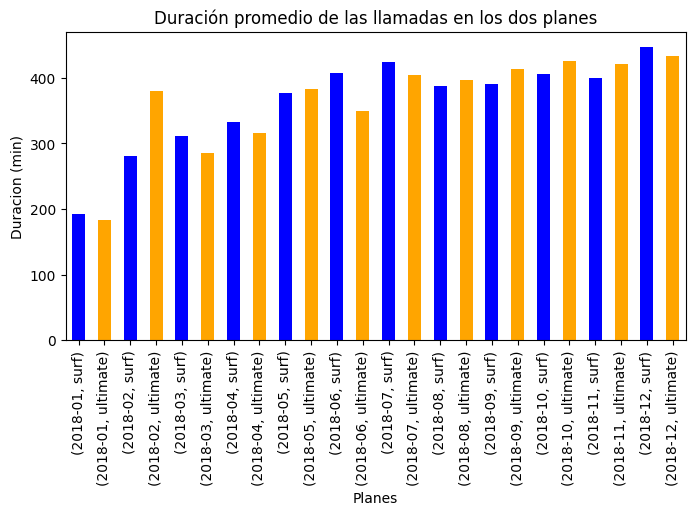

In [46]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
 
avg_min_per_user = data_with_plans_s.groupby(['month_year', 'plan_name'])['min_per_user'].mean()
plt.figure(figsize=(8, 4))
avg_min_per_user.plot(kind='bar', color=['blue', 'orange'], legend=False)
plt.title('Duración promedio de las llamadas en los dos planes')
plt.xlabel('Planes')
plt.ylabel('Duracion (min)')
plt.show()

<AxesSubplot:>

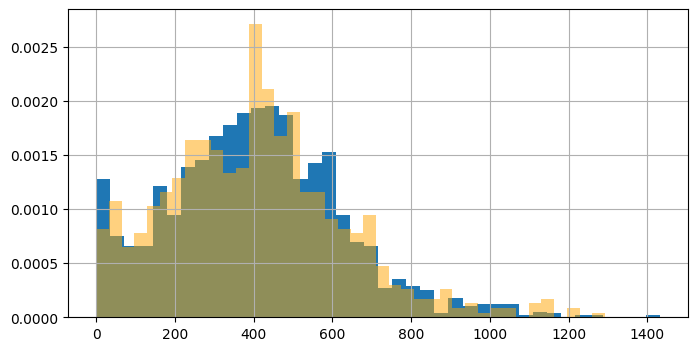

In [47]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_behavior = data_with_plans_s.query('plan_name == "surf"')
ultimate_behavior = data_with_plans_s.query('plan_name == "ultimate"')
plt.figure(figsize=(8,4))
surf_behavior ['min_per_user'].hist(bins=40,density=True)
ultimate_behavior ['min_per_user'].hist(bins=40, density=True, color='orange', alpha=0.5)

In [48]:
# Calcula la media y la varianza de la duración mensual de llamadas.
#Promedio de llamada Surf
surf_behavior = data_with_plans_s.query('plan_name == "surf"')
prom_calls_duration_surf =surf_behavior.groupby(['month_year'])['min_per_user'].apply(np.mean)
prom_calls_duration_surf


month_year
2018-01    192.840000
2018-02    280.851111
2018-03    310.970000
2018-04    332.380000
2018-05    377.053247
2018-06    407.208866
2018-07    424.523223
2018-08    387.169630
2018-09    390.992062
2018-10    405.692363
2018-11    399.599823
2018-12    447.475283
Freq: M, Name: min_per_user, dtype: float64

In [49]:
#Varianza de Surf
surf_behavior = data_with_plans_s.query('plan_name == "surf"')
var_calls_duration_surf = surf_behavior.groupby('month_year')['min_per_user'].apply(np.var)
var_calls_duration_surf

month_year
2018-01     7397.720100
2018-02    41741.528854
2018-03    30437.782426
2018-04    44703.353460
2018-05    52590.936214
2018-06    40338.468810
2018-07    53984.314774
2018-08    48315.962643
2018-09    41366.162199
2018-10    46534.251286
2018-11    45942.170426
2018-12    56804.054821
Freq: M, Name: min_per_user, dtype: float64

Text(0.5, 1.0, 'Surf Plan')

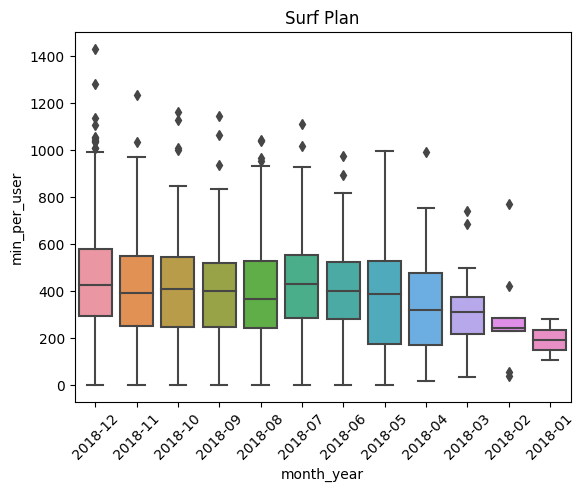

In [50]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(x='month_year', y='min_per_user', data=surf_behavior)
plt.xticks(rotation=45)
plt.title('Surf Plan')

In [51]:
#Promedio de llamada Ultimate
ultimate_behavior = data_with_plans_s.query('plan_name == "ultimate"')
prom_calls_duration_ultimate =ultimate_behavior.groupby(['month_year'])['min_per_user'].apply(np.mean)
prom_calls_duration_ultimate

month_year
2018-01    183.162500
2018-02    379.861429
2018-03    285.701667
2018-04    316.508095
2018-05    383.664828
2018-06    349.811064
2018-07    403.767288
2018-08    397.274789
2018-09    413.287326
2018-10    425.168019
2018-11    420.477559
2018-12    433.012583
Freq: M, Name: min_per_user, dtype: float64

In [52]:
#Varianza de Ultimate 
ultimate_behavior = data_with_plans_s.query('plan_name == "ultimate"')
var_calls_duration_surf = ultimate_behavior.groupby('month_year')['min_per_user'].apply(np.var)
var_calls_duration_surf

month_year
2018-01    11243.527469
2018-02    58748.818584
2018-03    49751.090814
2018-04    29578.788092
2018-05    37935.762287
2018-06    37116.480503
2018-07    63745.368874
2018-08    47008.637462
2018-09    50401.546147
2018-10    47914.889842
2018-11    53837.867938
2018-12    55412.302160
Freq: M, Name: min_per_user, dtype: float64

Text(0.5, 1.0, 'Ultimate Plan')

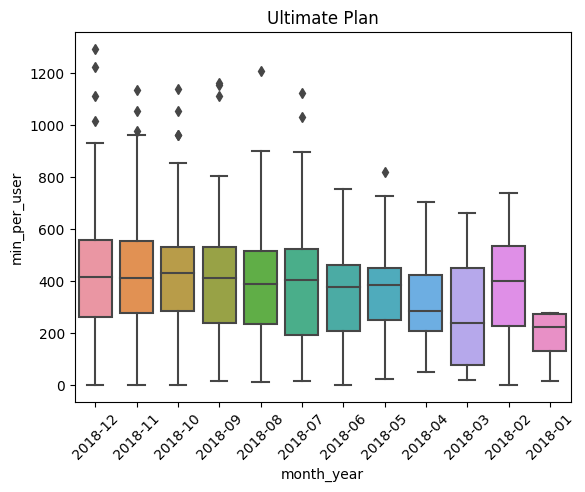

In [53]:
sns.boxplot(x='month_year', y='min_per_user', data=ultimate_behavior)
plt.xticks(rotation=45)
plt.title('Ultimate Plan')

Las principales diferencias es que en el plan de Ultimate hay menos dispersión en sus datos, al contrario Surf, que sus datos relacionados a minutos son mucho más dispersos y esto lo comprobamos con la varianza, que aunque en ambos resulta bastante en el boxplot podemos confirmar cuál de los 2 planes resulta tener más dispersión
Eso sí, el plan de Ultimate es más consistente en que aproximadamente 400 min por mes se ocupan en su plan.

En ambos casos ocupan menos minutos de los que se les proporcionan



### Mensajes

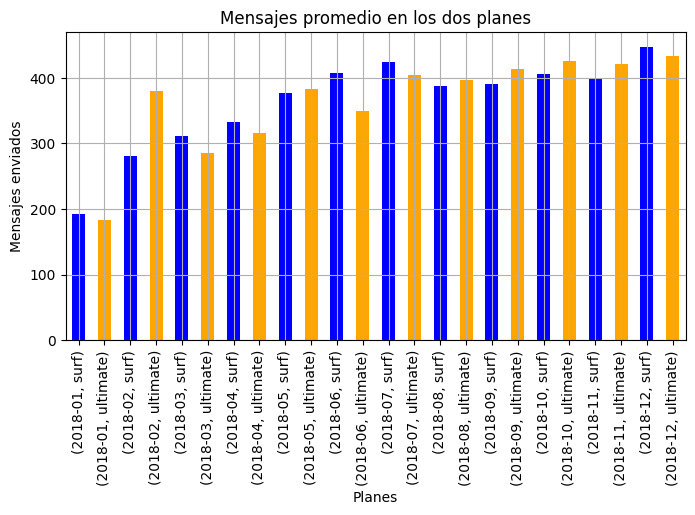

In [54]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msj_user = data_with_plans_s.groupby(['month_year', 'plan_name'])['msj_per_user'].mean()
plt.figure(figsize=(8, 4))
avg_min_per_user.plot(kind='bar', color=['blue', 'orange'], grid= True, legend=False)
plt.title('Mensajes promedio en los dos planes')
plt.xlabel('Planes')
plt.ylabel('Mensajes enviados')
plt.show()

<AxesSubplot:>

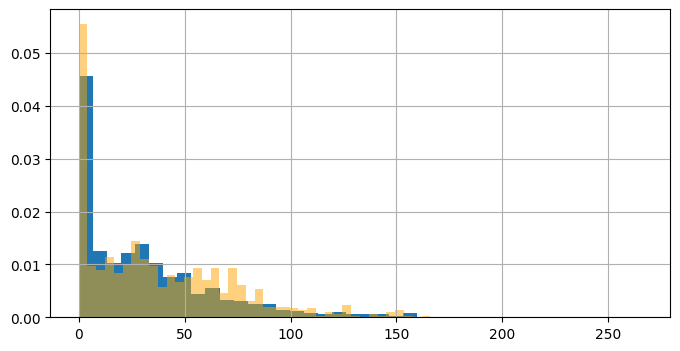

In [55]:
# Compara el mensajes mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_behavior = data_with_plans_s.query('plan_name == "surf"')
ultimate_behavior = data_with_plans_s.query('plan_name == "ultimate"')
plt.figure(figsize=(8,4))
surf_behavior ['msj_per_user'].hist(bins=40, density=True)
ultimate_behavior ['msj_per_user'].hist(bins=40,  density=True, color='orange', alpha=0.5)



En el plan de Ultimate sus usuarios no llegan ni cerca de los 1000 msj que se les da, el promedio ronda en los 30-50 mensajes por mes. Y son los usuarios que más reportan casos donde no ocupan sus mensajes incluídos.
En el caso del plan Surf de aunque son varios los que tampoco ocupan sus mensajes a la par, también visualizamos que varios usuarios rebasan los 50msj que incluye su plan y eso aumenta el costo total mensual del usuario.

### Internet

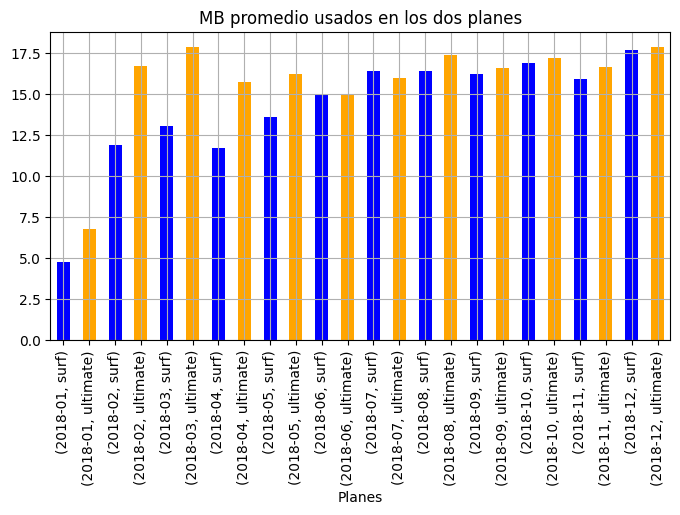

In [56]:
avg_mb_per_user = data_with_plans_s.groupby(['month_year', 'plan_name'])['traffic_per_gb'].mean()
plt.figure(figsize=(8, 4))
avg_mb_per_user.plot(kind='bar', color=['blue', 'orange'], legend=False, grid=True)
plt.title('MB promedio usados en los dos planes')
plt.xlabel('Planes')
plt.show()

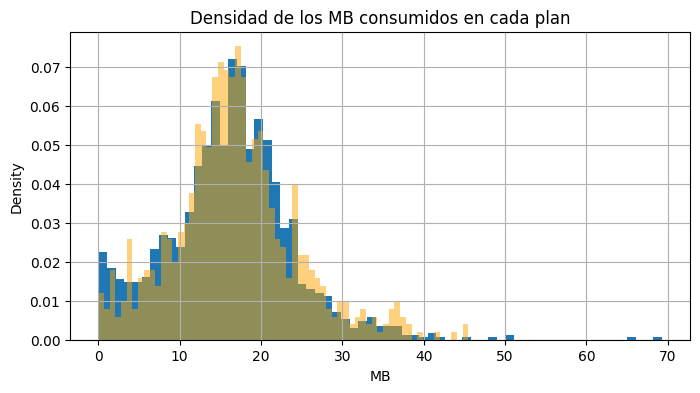

In [57]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
surf_behavior = data_with_plans_s.query('plan_name == "surf"')
ultimate_behavior = data_with_plans_s.query('plan_name == "ultimate"')
plt.figure(figsize=(8,4))
surf_behavior ['traffic_per_gb'].hist(bins=65, density=True)
ultimate_behavior ['traffic_per_gb'].hist(bins=65,density=True,   color='orange', alpha=0.5)
plt.title('Densidad de los MB consumidos en cada plan')
plt.xlabel('MB')
plt.ylabel('Density')
plt.show()


In [58]:
#Varianza del internet en Surf
surf_behavior_mb = data_with_plans_s.query('plan_name == "surf"')
var_mb_duration_surf = surf_behavior_mb.groupby('month_year')['traffic_per_gb'].apply(np.var)
var_mb_duration_surf

month_year
2018-01     8.697488
2018-02    37.022026
2018-03    62.254295
2018-04    55.183451
2018-05    57.867181
2018-06    46.374187
2018-07    61.180065
2018-08    70.739526
2018-09    48.687106
2018-10    59.379682
2018-11    54.334102
2018-12    68.588762
Freq: M, Name: traffic_per_gb, dtype: float64

In [59]:
#Varianza del internet en Ultimate
ultimate_behavior_mb = data_with_plans_s.query('plan_name == "ultimate"')
var_mb_duration_ultimate = ultimate_behavior_mb.groupby('month_year')['traffic_per_gb'].apply(np.var)
var_mb_duration_ultimate

month_year
2018-01     11.726412
2018-02     30.775694
2018-03    122.684703
2018-04     80.316278
2018-05     52.291714
2018-06     67.217167
2018-07     64.143718
2018-08     56.834904
2018-09     46.506241
2018-10     53.842149
2018-11     54.489152
2018-12     58.623782
Freq: M, Name: traffic_per_gb, dtype: float64

Text(0.5, 1.0, 'Surf Plan')

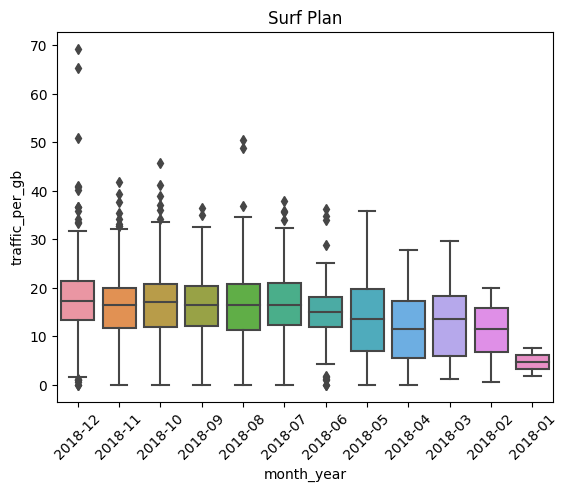

In [60]:
#BoxPlot Surf
sns.boxplot(x='month_year', y='traffic_per_gb', data=surf_behavior_mb)
plt.xticks(rotation=45)
plt.title('Surf Plan')

Text(0.5, 1.0, 'Ultimate Plan')

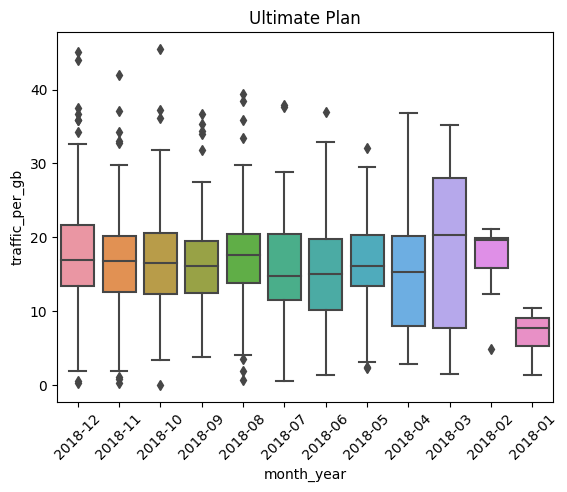

In [61]:
#BoxPlot Ultimate
sns.boxplot(x='month_year', y='traffic_per_gb', data=ultimate_behavior_mb)
plt.xticks(rotation=45)
plt.title('Ultimate Plan')

En el plan de Surf, aunque sus datos se encuentran dentro de los 15360Mb que se les dan, su promedio a partir de Julio comienza a ser más consistente. La gran mayoría de usuarios suelen rebasar estos Mb por lo que su gasto mensual incrementa.
En el plan Ultimate sus datos son más consistentes respecto a los 30000Mb que se les proporcionan en Septiembre sus datos comienzan a ser más consistentes.
En ambos casos sus mayores consumos se concentran en los 15000 y 18000Mb

## Ingreso

In [62]:
data_with_plans_s.head()

,user_id,month_year,num_calls,min_per_user,msj_per_user,traffic_per_gb,first_name,last_name,age,city,...,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_charges
0,1000,2018-12,16.0,116.83,11.0,1.856904,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,in_use,1000,30.0,3000,70,7,0.01,0.01,ultimate,70.00
720,1001,2018-12,56.0,392.93,44.0,18.915215,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,60.00
721,1001,2018-11,64.0,404.59,36.0,18.070605,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,60.00
722,1001,2018-10,65.0,374.11,53.0,21.807119,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,90.09
723,1001,2018-09,49.0,297.69,44.0,13.002754,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",...,in_use,50,15.0,500,20,10,0.03,0.03,surf,20.00


Como el cálculo lo había realizado líneas más arriba, procedí al análisis

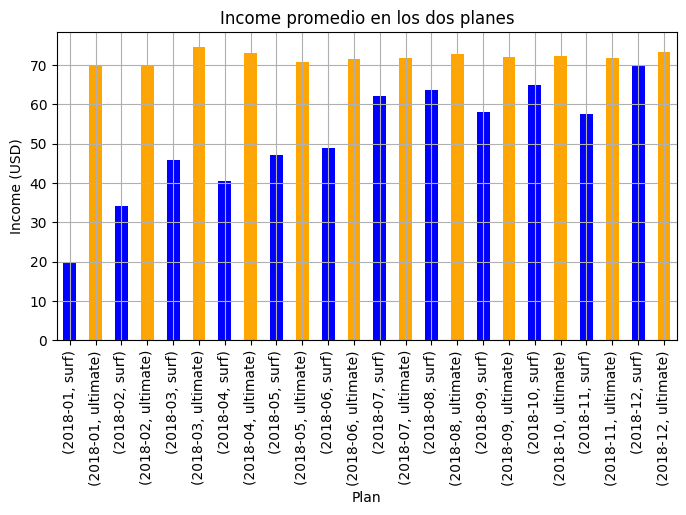

In [63]:
avg_income_per_user = data_with_plans_s.groupby(['month_year', 'plan_name'])['monthly_charges'].mean()
plt.figure(figsize=(8, 4))
avg_income_per_user.plot(kind='bar', color=['blue', 'orange'], legend=False, grid=True)
plt.title('Income promedio en los dos planes')
plt.ylabel('Income (USD)')
plt.xlabel('Plan')
plt.show()

In [64]:
#Promedio y Varianza para Ultimate
ultimate_behavior_inc = data_with_plans_s.query('plan_name == "ultimate"')
avg_inc_ultimate =ultimate_behavior_inc.groupby(['month_year'])['monthly_charges'].apply(np.mean)
avg_inc_ultimate

month_year
2018-01    70.000000
2018-02    70.000000
2018-03    74.666667
2018-04    73.000000
2018-05    70.724138
2018-06    71.638298
2018-07    71.898305
2018-08    72.859155
2018-09    72.034884
2018-10    72.311321
2018-11    71.708661
2018-12    73.291391
Freq: M, Name: monthly_charges, dtype: float64

In [65]:
ultimate_behavior_inc = data_with_plans_s.query('plan_name == "ultimate"')
var_inc_surf = ultimate_behavior_inc.groupby('month_year')['monthly_charges'].apply(np.var)
var_inc_surf 

month_year
2018-01      0.000000
2018-02      0.000000
2018-03    133.388889
2018-04    114.666667
2018-05     14.682521
2018-06     73.422363
2018-07    102.701523
2018-08    152.628050
2018-09     75.056923
2018-10    168.006853
2018-11     93.922996
2018-12    211.451515
Freq: M, Name: monthly_charges, dtype: float64

Text(0.5, 1.0, 'Ultimate Plan')

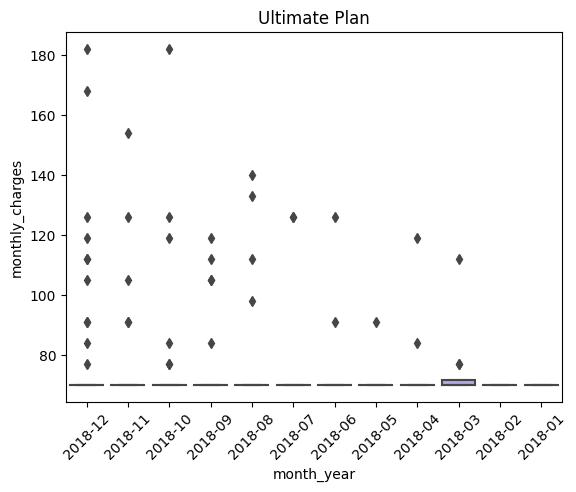

In [66]:
#BoxPlot Ultimate
sns.boxplot(x='month_year', y='monthly_charges', data=ultimate_behavior_inc)
plt.xticks(rotation=45)
plt.title('Ultimate Plan')

In [67]:
#Promedio y Varianza para Surf

In [68]:
surf_behavior_inc = data_with_plans_s.query('plan_name == "surf"')
avg_inc_surf =surf_behavior_inc.groupby(['month_year'])['monthly_charges'].apply(np.mean)
avg_inc_surf

month_year
2018-01    20.000000
2018-02    34.256733
2018-03    45.790261
2018-04    40.454700
2018-05    47.235155
2018-06    48.930735
2018-07    62.221942
2018-08    63.572562
2018-09    57.948540
2018-10    65.046710
2018-11    57.628813
2018-12    70.102687
Freq: M, Name: monthly_charges, dtype: float64

In [69]:
surf_behavior_inc = data_with_plans_s.query('plan_name == "surf"')
var_inc_surf = surf_behavior_inc.groupby('month_year')['monthly_charges'].apply(np.var)
var_inc_surf

month_year
2018-01       0.000000
2018-02     382.197340
2018-03    1442.058659
2018-04    1172.941840
2018-05    1924.496754
2018-06    1957.330835
2018-07    2897.151805
2018-08    3550.595437
2018-09    2240.608705
2018-10    3165.774383
2018-11    2476.494916
2018-12    4576.138234
Freq: M, Name: monthly_charges, dtype: float64

Text(0.5, 1.0, 'Surf Plan')

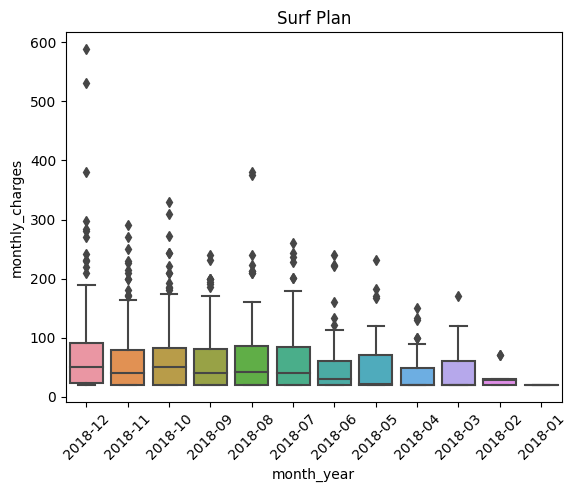

In [70]:
#BoxPlot Surf
sns.boxplot(x='month_year', y='monthly_charges', data=surf_behavior_inc)
plt.xticks(rotation=45)
plt.title('Surf Plan')

Del plan Surf de hecho es del que se está obteniendo mayores ingresos ya que sus usuarios es común que rebasen lo que se les proporciona dentro del plan así que terminan pagando más allá del doble del pago del plan así como también hay varios usuarios que están dispersos fuera del plan.
Por otro lado el plan Ultimate, también tiene usuarios que sobrepasan los parámetros del plan pero son pocos y la gran mayoria solo realizan el pago normal que son 70$

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones. En este caso las gráficas de box-plots nos ayudan a identificar outiers que pueden sesgar nuestros resultados, especificamente las pruebas de hipótesis. Es por ello que con estás gráficas puedes complementar el análisis eliminando los valores atipicos. 
</div>

## Prueba las hipótesis estadísticas

Hipótesis nula: Los ingresos son diferentes promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf

Hipótesis alternativa:Los ingresos no son diferentespromedio procedentes de los usuarios de los planes de llamada Ultimate y Surf

Alfa= 5%

In [71]:
# Prueba las hipótesis
from scipy.stats import ttest_ind

ttest_ind(
    data_with_plans_s.query('plan_name == "surf"')['monthly_charges'],
    data_with_plans_s.query('plan_name == "ultimate"')['monthly_charges'],
    equal_var = False
)


Ttest_indResult(statistic=-8.228840784742438, pvalue=3.5320199509520717e-16)


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
<b>Gracias! Lo he agregado tomando en cuenta lo que me mencionaste.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

Se RECHAZA la hipotesis nula ya que los dos promedios de los planes son diferentes, hay suficiente evidencia para deshecharla.

Hipótesis nula:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

Hipótesis alternativa:El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey no es diferente al de los usuarios de otras regiones.

Alfa= 5%

In [72]:
# Prueba las hipótesis
ny_nj_cities = data_with_plans_s[data_with_plans_s['city'].str.contains("NY|NJ|PA")]
other_cities = data_with_plans_s[~data_with_plans_s['city'].str.contains("NY|NJ|PA")]
ny_nj_charges = ny_nj_cities['monthly_charges']
other_cities_charges = other_cities['monthly_charges']
ttest_result = ttest_ind(ny_nj_charges, other_cities_charges, equal_var = False)

ttest_result

Ttest_indResult(statistic=-1.5476960348808966, pvalue=0.12206751357960303)


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre planes.
</div>

<div class="alert alert-block alert-info">
<b>Gracias! Lo agregué también. </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

Se ACEPTA la hipótesis ya que representa el 12%, entonces el ingreso promedio de los usuarios de Nueva York-Nueva Jersey sí es diferente a las demás regiones

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Mi conclusión general es que el plan Surf genera más ingresos para Megaline, aparentemente es un plan de menor costo pero comparado con Ultimate, este último la gran mayoría de sus usuarios pagan solo lo que corresponde a su paquete e incluso el pago por rebasar la tarifa dada de GB en el paquete es menor que el de Surf.
Una de las principales carácterísticas que lo vuelven un producto de valor para Megaline a Surf es que cuando el usuario rebasa los Mb proporcionados se redondea inmediatamente para realizar el cobro de 10$ y en la actualidad (o bien en 2018) el internet es uno de los productos más utilizados en el mundo.
En cuanto al cobro realizado por la duración de llamadas igualmente el plan Surf ofrece 500min pero el usuario es común que sobrepase este límite e incluso se llega a comparar el uso de minutos sobre el tiempo al de Ultimate, en tanto a Ultimate sus usuarios en mayoría no llegan a ocupar los 3000 minutos que se ofrecen
El producto menos utilizado son los mensajes ya que en ambos planes hay muchos que no hacen uso de ellos. En tanto a Surf, los usuarios que utulizan este servicio es común que sobrepasen el límite de 50msj y los de Ultimate no rebasan siquiera los 400 asi que los 1000 le quedan perfecto al usuario.



<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, así como juntar la información. Además, considero que el análisis con las gráficas y con las pruebas de hipótesis es muy acertado. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

    
*  verificar la  prueba de hipótesis
</div>

<div class="alert alert-block alert-info">
<b>Gracias por tu retroalimentación, igual cualquier otro detalle lo tomaré en cuenta! :) </b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>